In [631]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from shapely import wkb
from shapely import errors
import itertools
import matplotlib.pyplot as plt

In [651]:
taxi_zone_df = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv')

taxi_zone_df.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [652]:
taxi_zone_df.tail(10)

,LocationID,Borough,Zone,service_zone
255,256,Brooklyn,Williamsburg (South Side),Boro Zone
256,257,Brooklyn,Windsor Terrace,Boro Zone
257,258,Queens,Woodhaven,Boro Zone
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


In [634]:
taxi_zone_df['service_zone'].value_counts()

service_zone
Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: count, dtype: int64

In [635]:
zone_data = pd.read_parquet('https://data.source.coop/cholmes/nyc-taxi-zones/taxi_zones.parquet')

In [636]:
zone_data.tail()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
258,259,0.12675030519,0.00039455249,Woodlawn/Wakefield,259,Bronx,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe6\x00...
259,260,0.13351415464,0.00042234533,Woodside,260,Queens,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x10\x01...
260,261,0.02712045636,0.00003434232,World Trade Center,261,Manhattan,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00F\x00\x0..."
261,262,0.04906362315,0.00012233027,Yorkville East,262,Manhattan,"b""\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03..."
262,263,0.03701662530,0.00006576977,Yorkville West,263,Manhattan,b'\x01\x03\x00\x00\x00\x01\x00\x00\x000\x00\x0...


In [637]:
len(zone_data)

263

In [638]:
zone_data.head(20)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.11635745319,0.00078230679,Newark Airport,1,EWR,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe8\x00...
1,2,0.43346966679,0.00486634038,Jamaica Bay,2,Queens,b'\x01\x06\x00\x00\x00!\x00\x00\x00\x01\x03\x0...
2,3,0.08434110590,0.00031441416,Allerton/Pelham Gardens,3,Bronx,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00y\x00\x0...
3,4,0.04356652709,0.00011187195,Alphabet City,4,Manhattan,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00X\x00\x0...
4,5,0.09214648986,0.00049795749,Arden Heights,5,Staten Island,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xaa\x00...
5,6,0.15049054252,0.00060646098,Arrochar/Fort Wadsworth,6,Staten Island,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x15\x01...
6,7,0.10741717112,0.00038978799,Astoria,7,Queens,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xb6\x00...
7,8,0.02759069116,0.00002658772,Astoria Park,8,Queens,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00(\x00\x0...
8,9,0.09978409247,0.00033844380,Auburndale,9,Queens,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xbd\x00...
9,10,0.09983947942,0.00043582382,Baisley Park,10,Queens,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x9d\x00...


In [639]:
zone_long_lat_data = pd.read_parquet('https://data.source.coop/cholmes/nyc-taxi-zones/taxi_zones_4326.parquet')

In [640]:
zone_long_lat_data.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.11635745319,0.00078230679,Newark Airport,1,EWR,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe8\x00...
1,2,0.43346966679,0.00486634038,Jamaica Bay,2,Queens,b'\x01\x06\x00\x00\x00!\x00\x00\x00\x01\x03\x0...
2,3,0.08434110590,0.00031441416,Allerton/Pelham Gardens,3,Bronx,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00y\x00\x0...
3,4,0.04356652709,0.00011187195,Alphabet City,4,Manhattan,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00X\x00\x0...
4,5,0.09214648986,0.00049795749,Arden Heights,5,Staten Island,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xaa\x00...


In [641]:
print(zone_long_lat_data['geometry'])

0      b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe8\x00...
1      b'\x01\x06\x00\x00\x00!\x00\x00\x00\x01\x03\x0...
2      b'\x01\x03\x00\x00\x00\x01\x00\x00\x00y\x00\x0...
3      b'\x01\x03\x00\x00\x00\x01\x00\x00\x00X\x00\x0...
4      b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xaa\x00...
                             ...                        
258    b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe6\x00...
259    b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x10\x01...
260    b'\x01\x03\x00\x00\x00\x01\x00\x00\x00F\x00\x0...
261    b'\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03...
262    b'\x01\x03\x00\x00\x00\x01\x00\x00\x000\x00\x0...
Name: geometry, Length: 263, dtype: object


In [642]:
def safe_wkt_loads(wkt_string):
    try:
        return wkb.loads(wkt_string)
    except errors.WKTReadingError:
        return Point(0,0)

zone_long_lat_data['geometry'] = zone_long_lat_data['geometry'].apply(safe_wkt_loads)

geo_zone = gpd.GeoDataFrame(zone_long_lat_data, geometry=zone_long_lat_data['geometry'], crs="EPSG:4326")

geo_zone_proj = geo_zone.to_crs("EPSG:3857")

geo_zone_proj['centroid'] = geo_zone_proj['geometry'].centroid

# Calculate distances
distances = []
for (index1, row1), (index2, row2) in itertools.combinations(geo_zone_proj.iterrows(), 2):
    distance_meters = row1['centroid'].distance(row2['centroid'])
    distance_miles = distance_meters * 0.000621371
    distances.append({
        'zone_1': index1,
        'zone_2': index2,
        'distance_miles': distance_miles
    })

# Create a DataFrame from the results
distance_result_df = pd.DataFrame(distances)

print(distance_result_df)

       zone_1  zone_2  distance_miles
0           0       1       24.673642
1           0       2       27.549553
2           0       3       13.936532
3           0       4       12.722604
4           0       5       10.936038
...       ...     ...             ...
34448     259     261        4.013952
34449     259     262        4.416451
34450     260     261        7.638856
34451     260     262        7.668691
34452     261     262        0.404790

[34453 rows x 3 columns]


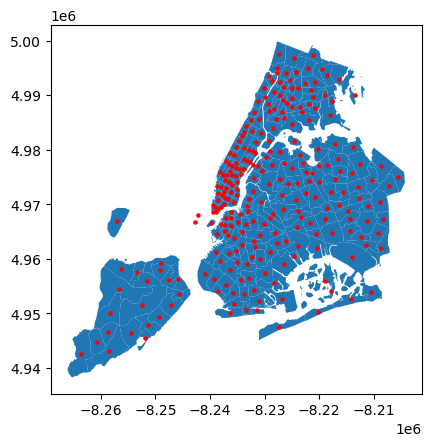

In [643]:
geo_zone_proj.plot()
geo_zone_proj['centroid'].plot(ax=plt.gca(), color='red', markersize=5)
plt.show()

In [644]:
geo_zone_proj['centroid'].head()

0    POINT (-8257011.847 4966992.844)
1    POINT (-8218862.517 4955975.362)
2     POINT (-8220657.463 4992372.04)
3    POINT (-8235078.417 4971680.104)
4    POINT (-8258624.297 4946581.381)
Name: centroid, dtype: geometry

In [649]:
for index, row in distance_result_df.iterrows():
    distance_result_df.loc[index, ['zone_1']] = (row['zone_1'] + 1)
    distance_result_df.loc[index, ['zone_2']] = (row['zone_2'] + 1)

In [650]:
display(distance_result_df.head(20))
display(distance_result_df.tail(20))

,zone_1,zone_2,distance_miles
0,1,2,24.673642
1,1,3,27.549553
2,1,4,13.936532
3,1,5,12.722604
4,1,6,10.936038
5,1,7,18.704284
6,1,8,19.076206
7,1,9,27.244540
8,1,10,26.519318
9,1,11,14.013530


,zone_1,zone_2,distance_miles
34433,257,259,23.952373
34434,257,260,9.640776
34435,257,261,5.614807
34436,257,262,11.373029
34437,257,263,11.572939
34438,258,259,19.116395
34439,258,260,6.155346
34440,258,261,11.035838
34441,258,262,10.137672
34442,258,263,10.533955


In [376]:
jan_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
feb_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet')
mar_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-03.parquet')
apr_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-04.parquet')
may_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-05.parquet')
jun_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-06.parquet')
jul_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-07.parquet')
aug_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-08.parquet')
sep_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-09.parquet')
oct_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-10.parquet')
nov_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-11.parquet')
dec_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-12.parquet')


In [377]:
jan_df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.50,0.5,6.90,0.00,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.00,0.5,10.00,0.00,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.50,0.5,0.00,0.00,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.00,0.5,0.00,0.00,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.00,0.5,0.00,0.00,1.0,8.00,2.5,0.00


In [378]:
dfs = [jan_df, feb_df, mar_df, apr_df, may_df, jun_df, jul_df, aug_df, sep_df, oct_df, nov_df, dec_df]

ny_taxi_2024_df = pd.concat(dfs)

In [379]:
print(f'{len(ny_taxi_2024_df):,.2f}')

41,169,720.00


In [380]:
display(ny_taxi_2024_df.head(10))
display(ny_taxi_2024_df.tail(10))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.00,0.0,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.00


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3668361,1,2024-12-31 23:21:36,2024-12-31 23:32:10,NaN,1.60,NaN,None,188,61,0,13.28,0.0,0.5,0.00,0.00,1.0,14.78,NaN,NaN
3668362,2,2024-12-31 23:02:30,2024-12-31 23:23:16,NaN,2.47,NaN,None,37,37,0,-0.90,0.0,0.5,0.00,0.00,1.0,0.60,NaN,NaN
3668363,2,2024-12-31 23:04:03,2024-12-31 23:14:58,NaN,1.96,NaN,None,137,79,0,-7.72,0.0,0.5,0.00,0.00,1.0,-3.72,NaN,NaN
3668364,1,2024-12-31 23:14:53,2024-12-31 23:35:13,NaN,2.90,NaN,None,145,164,0,21.94,0.0,0.5,0.00,6.94,1.0,32.88,NaN,NaN
3668365,2,2024-12-31 23:04:32,2024-12-31 23:19:51,NaN,2.49,NaN,None,37,36,0,-0.38,0.0,0.5,0.00,0.00,1.0,6.12,NaN,NaN
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,NaN,10.71,NaN,None,16,7,0,-4.13,0.0,0.5,0.00,0.00,1.0,-2.63,NaN,NaN
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,NaN,4.56,NaN,None,252,16,0,-1.68,0.0,0.5,0.00,0.00,1.0,-0.18,NaN,NaN
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,NaN,3.94,NaN,None,181,255,0,4.46,0.0,0.5,5.19,0.00,1.0,11.15,NaN,NaN
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,NaN,4.20,NaN,None,165,61,0,27.07,0.0,0.5,0.00,0.00,1.0,28.57,NaN,NaN
3668370,2,2024-12-31 23:04:36,2024-12-31 23:33:34,NaN,5.76,NaN,None,225,114,0,2.17,0.0,0.5,0.00,0.00,1.0,6.17,NaN,NaN


In [381]:
len(ny_taxi_2024_df[ny_taxi_2024_df["PULocationID"] == 264].value_counts())

119824

In [382]:
len(ny_taxi_2024_df[ny_taxi_2024_df["DOLocationID"] == 264].value_counts())

182294

In [383]:
len(ny_taxi_2024_df[(ny_taxi_2024_df["PULocationID"] == 264) & (ny_taxi_2024_df["DOLocationID"] != 264)].value_counts())

49799

In [384]:
len(ny_taxi_2024_df[(ny_taxi_2024_df["DOLocationID"] == 264) & (ny_taxi_2024_df["PULocationID"] != 264)].value_counts())

112269

In [385]:
ny_taxi_2024_df['RatecodeID'].value_counts()

RatecodeID
1.0     34651027
2.0      1406870
99.0      466974
5.0       321948
3.0       129951
4.0       101642
6.0           76
Name: count, dtype: int64

In [386]:
ny_taxi_2024_df['passenger_count'].isna().sum()/len(ny_taxi_2024_df['passenger_count'])

0.09937478321445956

In [387]:
ny_taxi_2024_df['RatecodeID'].isna().sum()/len(ny_taxi_2024_df['RatecodeID'])

0.09937478321445956

In [388]:
ny_taxi_2024_df['congestion_surcharge'].isna().sum()/len(ny_taxi_2024_df['congestion_surcharge'])

0.09937478321445956

In [389]:
ny_taxi_2024_df['Airport_fee'].isna().sum()/len(ny_taxi_2024_df['Airport_fee'])

0.09937478321445956

In [390]:
ny_taxi_2024_df['store_and_fwd_flag'].isna().sum()/len(ny_taxi_2024_df['store_and_fwd_flag'])

0.09937478321445956

In [391]:
for column in ny_taxi_2024_df:

    print(ny_taxi_2024_df[column].isna().sum()/len(ny_taxi_2024_df[column]))

0.0
0.0
0.0
0.09937478321445956
0.0
0.09937478321445956
0.09937478321445956
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09937478321445956
0.09937478321445956


In [392]:
ny_taxi_2024_df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [393]:
ny_taxi_2024_df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    36903316
Y      175172
Name: count, dtype: int64

In [394]:
ny_taxi_2024_df['store_and_fwd_flag'] = ny_taxi_2024_df['store_and_fwd_flag'].fillna('N')

In [395]:
ny_taxi_2024_df['passenger_count'].value_counts()

passenger_count
1.0    28632703
2.0     5410774
3.0     1282073
4.0      814889
0.0      401354
5.0      320613
6.0      215798
8.0         192
7.0          56
9.0          36
Name: count, dtype: int64

In [396]:
def impute_passenger_count(ny_taxi_2024_df):
    ny_taxi_2024_df['passenger_count'] = ny_taxi_2024_df['passenger_count'].fillna(1)
    pass_mask = (ny_taxi_2024_df['passenger_count'] == 0)

    ny_taxi_2024_df.loc[pass_mask, 'passenger_count'] = 1

    return ny_taxi_2024_df


In [397]:
impute_passenger_count(ny_taxi_2024_df)

ny_taxi_2024_df['passenger_count'].value_counts()

passenger_count
1.0    33125289
2.0     5410774
3.0     1282073
4.0      814889
5.0      320613
6.0      215798
8.0         192
7.0          56
9.0          36
Name: count, dtype: int64

In [398]:
ny_taxi_2024_df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3668361,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,NaN,N,188,61,0,13.28,0.0,0.5,0.00,0.00,1.0,14.78,NaN,NaN
3668362,2,2024-12-31 23:02:30,2024-12-31 23:23:16,1.0,2.47,NaN,N,37,37,0,-0.90,0.0,0.5,0.00,0.00,1.0,0.60,NaN,NaN
3668363,2,2024-12-31 23:04:03,2024-12-31 23:14:58,1.0,1.96,NaN,N,137,79,0,-7.72,0.0,0.5,0.00,0.00,1.0,-3.72,NaN,NaN
3668364,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,NaN,N,145,164,0,21.94,0.0,0.5,0.00,6.94,1.0,32.88,NaN,NaN
3668365,2,2024-12-31 23:04:32,2024-12-31 23:19:51,1.0,2.49,NaN,N,37,36,0,-0.38,0.0,0.5,0.00,0.00,1.0,6.12,NaN,NaN
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,NaN,N,16,7,0,-4.13,0.0,0.5,0.00,0.00,1.0,-2.63,NaN,NaN
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,NaN,N,252,16,0,-1.68,0.0,0.5,0.00,0.00,1.0,-0.18,NaN,NaN
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,NaN,N,181,255,0,4.46,0.0,0.5,5.19,0.00,1.0,11.15,NaN,NaN
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,NaN,N,165,61,0,27.07,0.0,0.5,0.00,0.00,1.0,28.57,NaN,NaN
3668370,2,2024-12-31 23:04:36,2024-12-31 23:33:34,1.0,5.76,NaN,N,225,114,0,2.17,0.0,0.5,0.00,0.00,1.0,6.17,NaN,NaN


In [399]:
start_date = pd.to_datetime('2024-12-01 00:00:00')
end_date = pd.to_datetime('2024-12-31 23:33:34')

In [400]:
december_df = ny_taxi_2024_df.loc[(ny_taxi_2024_df['tpep_pickup_datetime'] >= start_date) & (ny_taxi_2024_df['tpep_pickup_datetime'] <= end_date)]
display(december_df.head())
display(december_df.tail())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3178038,2,2024-12-01 00:04:01,2024-12-01 00:15:11,1.0,1.97,1.0,N,114,170,1,12.8,1.0,0.5,3.56,0.0,1.0,21.36,2.5,0.0
3220341,2,2024-12-01 15:35:18,2024-12-01 15:56:58,1.0,2.74,1.0,N,237,142,1,20.5,0.0,0.5,4.90,0.0,1.0,29.40,2.5,0.0
3220342,2,2024-12-01 15:57:57,2024-12-01 16:12:50,1.0,2.61,1.0,N,142,263,1,16.3,0.0,0.5,4.06,0.0,1.0,24.36,2.5,0.0
3227441,2,2024-12-01 16:34:09,2024-12-01 16:41:29,1.0,1.59,1.0,N,143,48,1,10.0,0.0,0.5,0.00,0.0,1.0,14.00,2.5,0.0
3227442,2,2024-12-01 16:57:49,2024-12-01 17:15:24,1.0,2.26,1.0,N,68,224,1,17.0,0.0,0.5,5.25,0.0,1.0,26.25,2.5,0.0


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,NaN,N,16,7,0,-4.13,0.0,0.5,0.00,0.0,1.0,-2.63,NaN,NaN
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,NaN,N,252,16,0,-1.68,0.0,0.5,0.00,0.0,1.0,-0.18,NaN,NaN
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,NaN,N,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,NaN,NaN
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,NaN,N,165,61,0,27.07,0.0,0.5,0.00,0.0,1.0,28.57,NaN,NaN
3668370,2,2024-12-31 23:04:36,2024-12-31 23:33:34,1.0,5.76,NaN,N,225,114,0,2.17,0.0,0.5,0.00,0.0,1.0,6.17,NaN,NaN


In [401]:
for column in december_df:

    print(december_df[column].isna().sum()/len(december_df[column]))

0.0
0.0
0.0
0.0
0.0
0.08895266870822686
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08895266870822686
0.08895266870822686


In [402]:
def find_airport_zones_vectorized(taxi_zone_df):
    airport_mask = taxi_zone_df['Zone'].str.contains('Airport', case=False, na=False)
    airport_rows = taxi_zone_df[airport_mask].to_dict(orient='records')
    return airport_rows

In [403]:
find_airport_zones_vectorized(taxi_zone_df)

[{'LocationID': 1,
  'Borough': 'EWR',
  'Zone': 'Newark Airport',
  'service_zone': 'EWR'},
 {'LocationID': 132,
  'Borough': 'Queens',
  'Zone': 'JFK Airport',
  'service_zone': 'Airports'},
 {'LocationID': 138,
  'Borough': 'Queens',
  'Zone': 'LaGuardia Airport',
  'service_zone': 'Airports'}]

In [404]:
ny_taxi_2024_df['Airport_fee'].value_counts()

Airport_fee
 0.00    33765255
 1.75     3213953
-1.75       99253
 1.25          27
Name: count, dtype: int64

In [405]:
def impute_airport_fee(ny_taxi_2024_df):
    
    pu_mask = (ny_taxi_2024_df['PULocationID'] == 132) | (ny_taxi_2024_df['PULocationID'] == 138)
    fee_mask = np.isnan(ny_taxi_2024_df['Airport_fee']) | (ny_taxi_2024_df['Airport_fee'] == 1.25) | (ny_taxi_2024_df['Airport_fee'] == -1.75)
    mask = pu_mask & fee_mask
    ny_taxi_2024_df.loc[mask, 'Airport_fee'] = 1.75
    return ny_taxi_2024_df

In [406]:
impute_airport_fee(ny_taxi_2024_df)

ny_taxi_2024_df['Airport_fee'].value_counts()

Airport_fee
 0.00    33765255
 1.75     3323271
-1.75        2800
 1.25           4
Name: count, dtype: int64

In [407]:
def impute_outliers_airport_fee(ny_taxi_2024_df):
    
    pu_mask = (
        ny_taxi_2024_df['PULocationID'] != 132) | (
        ny_taxi_2024_df['PULocationID'] != 138) 
    fee_mask = np.isnan(
        ny_taxi_2024_df['Airport_fee']) | (
        ny_taxi_2024_df['Airport_fee'] == 1.25) | (
            ny_taxi_2024_df['Airport_fee'] == -1.75)
    mask = pu_mask & fee_mask
    ny_taxi_2024_df.loc[mask, 'Airport_fee'] = 0
    return ny_taxi_2024_df

In [408]:
impute_outliers_airport_fee(ny_taxi_2024_df)

ny_taxi_2024_df['Airport_fee'].value_counts()

Airport_fee
0.00    37846449
1.75     3323271
Name: count, dtype: int64

In [409]:
ny_taxi_2024_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [410]:
for column in ny_taxi_2024_df:

    print(ny_taxi_2024_df[column].isna().sum()/len(ny_taxi_2024_df[column]))

0.0
0.0
0.0
0.0
0.0
0.09937478321445956
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09937478321445956
0.0


In [411]:
ny_taxi_2024_df.tail(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3668361,1,2024-12-31 23:21:36,2024-12-31 23:32:10,1.0,1.60,NaN,N,188,61,0,13.28,0.0,0.5,0.00,0.00,1.0,14.78,NaN,0.0
3668362,2,2024-12-31 23:02:30,2024-12-31 23:23:16,1.0,2.47,NaN,N,37,37,0,-0.90,0.0,0.5,0.00,0.00,1.0,0.60,NaN,0.0
3668363,2,2024-12-31 23:04:03,2024-12-31 23:14:58,1.0,1.96,NaN,N,137,79,0,-7.72,0.0,0.5,0.00,0.00,1.0,-3.72,NaN,0.0
3668364,1,2024-12-31 23:14:53,2024-12-31 23:35:13,1.0,2.90,NaN,N,145,164,0,21.94,0.0,0.5,0.00,6.94,1.0,32.88,NaN,0.0
3668365,2,2024-12-31 23:04:32,2024-12-31 23:19:51,1.0,2.49,NaN,N,37,36,0,-0.38,0.0,0.5,0.00,0.00,1.0,6.12,NaN,0.0
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,NaN,N,16,7,0,-4.13,0.0,0.5,0.00,0.00,1.0,-2.63,NaN,0.0
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,NaN,N,252,16,0,-1.68,0.0,0.5,0.00,0.00,1.0,-0.18,NaN,0.0
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,NaN,N,181,255,0,4.46,0.0,0.5,5.19,0.00,1.0,11.15,NaN,0.0
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,NaN,N,165,61,0,27.07,0.0,0.5,0.00,0.00,1.0,28.57,NaN,0.0
3668370,2,2024-12-31 23:04:36,2024-12-31 23:33:34,1.0,5.76,NaN,N,225,114,0,2.17,0.0,0.5,0.00,0.00,1.0,6.17,NaN,0.0


In [412]:
ny_taxi_2024_df['RatecodeID'].value_counts()

RatecodeID
1.0     34651027
2.0      1406870
99.0      466974
5.0       321948
3.0       129951
4.0       101642
6.0           76
Name: count, dtype: int64

In [413]:
ny_taxi_2024_df[ny_taxi_2024_df['RatecodeID'] == 4].head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
177,2,2024-01-01 00:16:21,2024-01-01 00:46:36,1.0,23.00,4.0,N,70,265,2,125.5,6.00,0.5,0.00,0.00,1.0,134.75,0.0,1.75
1035,2,2024-01-01 00:47:05,2024-01-01 01:03:14,3.0,4.18,4.0,N,48,265,2,22.6,1.00,0.0,0.00,12.75,1.0,37.35,0.0,0.00
1316,2,2024-01-01 00:00:11,2024-01-01 00:42:33,1.0,9.89,4.0,N,234,265,2,81.4,1.00,0.0,0.00,12.75,1.0,96.15,0.0,0.00
2701,2,2024-01-01 00:48:30,2024-01-01 01:09:02,1.0,15.79,4.0,N,132,15,4,-91.9,-1.00,-0.5,0.00,0.00,-1.0,-96.15,0.0,1.75
2702,2,2024-01-01 00:48:30,2024-01-01 01:09:02,1.0,15.79,4.0,N,132,16,4,91.9,1.00,0.5,0.00,0.00,1.0,96.15,0.0,1.75
3233,2,2024-01-01 00:13:49,2024-01-01 00:42:27,2.0,25.13,4.0,N,132,265,1,108.7,1.00,0.5,0.00,6.94,1.0,119.89,0.0,1.75
3508,2,2024-01-01 00:24:30,2024-01-01 01:13:09,1.0,27.08,4.0,N,163,265,1,138.8,1.00,0.5,29.37,3.05,1.0,176.22,2.5,0.00
3600,2,2024-01-01 00:35:44,2024-01-01 01:19:49,2.0,36.75,4.0,N,138,265,1,220.7,6.00,0.5,45.64,0.00,1.0,275.59,0.0,1.75
3906,2,2024-01-01 00:47:53,2024-01-01 01:29:06,4.0,26.71,4.0,N,170,265,2,125.5,1.00,0.5,0.00,6.94,1.0,137.44,2.5,0.00
3929,1,2024-01-01 00:32:49,2024-01-01 00:54:05,1.0,10.00,4.0,N,132,265,1,45.7,2.75,0.5,12.50,0.00,1.0,62.45,0.0,1.75


In [414]:
def find_ratecode_zones_vectorized(taxi_zone_df):
    pattern = r'JFK|Newark|Nassau|Westchester'
    ratecode_rows = taxi_zone_df['Zone'].str.contains(pattern, case=False, na=False)
    ratecode_rows = taxi_zone_df[ratecode_rows].to_dict(orient='records')
    return ratecode_rows

In [415]:
taxi_zone_df[taxi_zone_df['Zone'].str.contains('Nassau', case=False, na=False)].head()

,LocationID,Borough,Zone,service_zone


In [416]:
find_ratecode_zones_vectorized(taxi_zone_df)

[{'LocationID': 1,
  'Borough': 'EWR',
  'Zone': 'Newark Airport',
  'service_zone': 'EWR'},
 {'LocationID': 132,
  'Borough': 'Queens',
  'Zone': 'JFK Airport',
  'service_zone': 'Airports'},
 {'LocationID': 250,
  'Borough': 'Bronx',
  'Zone': 'Westchester Village/Unionport',
  'service_zone': 'Boro Zone'}]

In [417]:
def impute_na_ratecodeID(ny_taxi_2024_df):
    def_mask = (ny_taxi_2024_df['PULocationID'] != ny_taxi_2024_df['PULocationID'].isin([np.isnan, 1, 132, 250, 265])) | (
        ny_taxi_2024_df['DOLocationID'] != ny_taxi_2024_df['DOLocationID'].isin([np.isnan, 1, 132, 250, 265])
    )
    rate_mask = (ny_taxi_2024_df['RatecodeID'] > 6) | np.isnan(ny_taxi_2024_df['RatecodeID'])
    mask = def_mask & rate_mask
    ny_taxi_2024_df.loc[mask, ['RatecodeID']] = 1
    return ny_taxi_2024_df

In [418]:
impute_na_ratecodeID(ny_taxi_2024_df)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,1.0,N,16,7,0,-4.13,0.0,0.5,0.00,0.0,1.0,-2.63,NaN,0.0
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,1.0,N,252,16,0,-1.68,0.0,0.5,0.00,0.0,1.0,-0.18,NaN,0.0
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,N,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,NaN,0.0
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,N,165,61,0,27.07,0.0,0.5,0.00,0.0,1.0,28.57,NaN,0.0


In [419]:
ny_taxi_2024_df['RatecodeID'].value_counts()

RatecodeID
1.0    39209213
2.0     1406870
5.0      321948
3.0      129951
4.0      101642
6.0          76
Name: count, dtype: int64

In [420]:
def impute_ratecodeIDs(ny_taxi_2024_df):
    mask = (ny_taxi_2024_df['PULocationID'] == 1) | (ny_taxi_2024_df['DOLocationID'] == 1)
    mask_2 = (ny_taxi_2024_df['PULocationID'] == 132) | (ny_taxi_2024_df['DOLocationID'] == 132)
    mask_3 = (ny_taxi_2024_df['PULocationID'] == 250) | (ny_taxi_2024_df['DOLocationID'] == 250) | (
        ny_taxi_2024_df['PULocationID'] == 265) | (ny_taxi_2024_df['DOLocationID'] == 265)
    ny_taxi_2024_df.loc[mask, ['RatecodeID']] = 3
    ny_taxi_2024_df.loc[mask_2, ['RatecodeID']] = 2
    ny_taxi_2024_df.loc[mask_3, ['RatecodeID']] = 4
    return ny_taxi_2024_df
    

In [421]:
impute_ratecodeIDs(ny_taxi_2024_df)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,1.0,N,16,7,0,-4.13,0.0,0.5,0.00,0.0,1.0,-2.63,NaN,0.0
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,1.0,N,252,16,0,-1.68,0.0,0.5,0.00,0.0,1.0,-0.18,NaN,0.0
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,N,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,NaN,0.0
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,N,165,61,0,27.07,0.0,0.5,0.00,0.0,1.0,28.57,NaN,0.0


In [422]:
ny_taxi_2024_df['RatecodeID'].value_counts()

RatecodeID
1.0    38261195
2.0     2376302
5.0      203414
4.0      196787
3.0      131965
6.0          57
Name: count, dtype: int64

In [423]:
for column in ny_taxi_2024_df:

    print(ny_taxi_2024_df[column].isna().sum()/len(ny_taxi_2024_df[column]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09937478321445956
0.0


In [424]:
ny_taxi_2024_df['congestion_surcharge'].value_counts()

congestion_surcharge
 2.50    33601544
 0.00     2981167
-2.50      495742
 1.00          18
 0.75          12
-0.75           3
 2.00           1
 2.52           1
Name: count, dtype: int64

In [425]:
ny_taxi_2024_df[ny_taxi_2024_df['congestion_surcharge'] == -0.75]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
2796848,2,2024-01-31 18:27:00,2024-01-31 18:28:04,1.0,0.00,6.0,N,79,79,4,-2.5,0.0,-0.5,0.0,0.0,-1.0,-4.75,-0.75,0.0
1919717,2,2024-03-19 16:46:50,2024-03-19 16:47:23,1.0,0.02,6.0,N,170,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-2.25,-0.75,0.0
2062349,2,2024-10-19 19:53:54,2024-10-19 19:55:55,1.0,0.10,6.0,N,164,164,3,-5.5,0.0,-0.5,0.0,0.0,-1.0,-7.75,-0.75,0.0


In [426]:
def impute_negatives(ny_taxi_2024_df):
    negatives = ['fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']
    mask = (ny_taxi_2024_df[negatives] < 0).any(axis=1)
    mask_2 = (np.isnan(ny_taxi_2024_df['congestion_surcharge']))
    ny_taxi_2024_df.loc[mask, negatives] = ny_taxi_2024_df.loc[mask, negatives].abs()
    ny_taxi_2024_df.loc[mask_2, ['congestion_surcharge']] = 0
    return ny_taxi_2024_df

In [427]:
impute_negatives(ny_taxi_2024_df)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,1.0,N,16,7,0,4.13,0.0,0.5,0.00,0.0,1.0,2.63,0.0,0.0
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,1.0,N,252,16,0,1.68,0.0,0.5,0.00,0.0,1.0,0.18,0.0,0.0
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,N,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,0.0,0.0
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,N,165,61,0,27.07,0.0,0.5,0.00,0.0,1.0,28.57,0.0,0.0


In [428]:
for column in ny_taxi_2024_df:

    print(ny_taxi_2024_df[column].isna().sum()/len(ny_taxi_2024_df[column]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [429]:
for column in ny_taxi_2024_df:
    print(ny_taxi_2024_df[column].value_counts())

VendorID
2    31451503
1     9715918
6        2069
7         230
Name: count, dtype: int64
tpep_pickup_datetime
2024-06-14 19:33:00    17
2024-04-02 18:15:00    17
2024-11-26 11:00:00    16
2024-11-15 10:30:00    16
2024-11-15 14:00:00    16
                       ..
2024-07-31 07:29:16     1
2024-07-31 07:54:32     1
2024-07-31 07:38:24     1
2024-02-24 19:38:32     1
2024-12-31 23:02:30     1
Name: count, Length: 20049544, dtype: int64
tpep_dropoff_datetime
2024-04-20 00:00:00    25
2024-12-13 07:59:20    24
2024-12-13 08:02:00    23
2024-12-13 07:59:19    23
2024-06-13 00:00:00    22
                       ..
2024-04-17 10:08:45     1
2024-08-31 22:10:35     1
2024-04-17 10:39:06     1
2024-04-17 10:28:10     1
2024-12-31 23:23:16     1
Name: count, Length: 20030251, dtype: int64
passenger_count
1.0    33125289
2.0     5410774
3.0     1282073
4.0      814889
5.0      320613
6.0      215798
8.0         192
7.0          56
9.0          36
Name: count, dtype: int64
trip_distance
0.00  

In [430]:
ny_taxi_2024_df[ny_taxi_2024_df['trip_distance'] == 223463.68]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3665784,2,2024-12-31 22:18:00,2024-12-31 23:05:00,1.0,223463.68,1.0,N,61,164,0,44.85,0.0,0.5,2.12,0.0,1.0,50.97,0.0,0.0


In [431]:
#def trip_distance_weird_maxes(ny_taxi_2024_df):
    #long = (ny_taxi_2024_df['trip_distance'] > 50)
    #cost = (ny_taxi_2024_df['total_amount'] < 100)
    #params = long & cost
    #ny_taxi_2024_df.loc[params, ['trip_distance']] = (ny_taxi_2024_df.loc[params, ['fare_amount']] / 5.2)
    #ny_taxi_2024_df.loc[params, ['trip_distance']] = (ny_taxi_2024_df.loc[params, ['trip_distance']] * 1.05)
    #return ny_taxi_2024_df

In [432]:
#trip_distance_weird_maxes(ny_taxi_2024_df)

#ny_taxi_2024_df['trip_distance'].value_counts()

In [433]:
ny_taxi_2024_df[ny_taxi_2024_df['trip_distance'] == 197.97]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3628231,2,2024-12-24 20:16:18,2024-12-24 23:52:37,1.0,197.97,4.0,N,230,265,0,442.91,0.0,0.0,0.0,0.0,1.0,443.91,0.0,0.0


In [434]:
ny_taxi_2024_df[ny_taxi_2024_df['trip_distance'] == 67.32]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
266673,2,2024-01-04 15:23:03,2024-01-04 17:20:56,4.0,67.32,4.0,N,132,265,1,350.0,0.0,0.0,10.0,6.94,1.0,369.69,0.0,1.75


In [435]:
ny_taxi_2024_df[ny_taxi_2024_df['trip_distance'] > 50]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
8274,2,2024-01-01 01:18:30,2024-01-01 02:48:00,1.0,54.94,4.0,N,132,265,2,243.10,1.0,0.0,0.00,13.88,1.0,260.73,0.0,1.75
16093,2,2024-01-01 02:37:39,2024-01-01 04:25:31,1.0,54.81,4.0,N,158,265,2,299.10,1.0,0.5,0.00,13.88,1.0,317.98,2.5,0.00
25906,2,2024-01-01 08:09:04,2024-01-01 09:18:26,1.0,60.93,4.0,N,132,265,1,150.00,0.0,0.0,33.50,14.75,1.0,201.00,0.0,1.75
29432,2,2024-01-01 10:42:19,2024-01-01 11:35:08,1.0,51.83,4.0,N,230,265,1,357.90,0.0,0.0,0.00,12.75,1.0,371.65,0.0,0.00
36881,2,2024-01-01 13:30:49,2024-01-01 14:27:09,1.0,51.93,4.0,N,132,265,1,185.70,0.0,0.5,37.44,0.00,1.0,226.39,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655027,2,2024-12-30 06:14:00,2024-12-30 06:23:00,1.0,2502.42,1.0,N,238,68,0,18.31,0.0,0.5,1.12,0.00,1.0,23.43,0.0,0.00
3658720,2,2024-12-31 03:28:00,2024-12-31 03:38:00,1.0,52229.24,1.0,N,68,170,0,1.43,0.0,0.5,0.00,0.00,1.0,5.57,0.0,0.00
3659141,2,2024-12-31 08:11:00,2024-12-31 08:22:00,1.0,67605.76,1.0,N,170,231,0,4.08,0.0,0.5,0.00,0.00,1.0,8.08,0.0,0.00
3660037,2,2024-12-31 13:03:00,2024-12-31 13:27:00,1.0,52735.97,1.0,N,161,13,0,27.85,0.0,0.5,0.00,0.00,1.0,31.85,0.0,0.00


In [436]:
ny_taxi_2024_df[ny_taxi_2024_df['fare_amount'] < 50]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,1.0,N,16,7,0,4.13,0.0,0.5,0.00,0.0,1.0,2.63,0.0,0.0
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,1.0,N,252,16,0,1.68,0.0,0.5,0.00,0.0,1.0,0.18,0.0,0.0
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,N,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,0.0,0.0
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,N,165,61,0,27.07,0.0,0.5,0.00,0.0,1.0,28.57,0.0,0.0


In [437]:
# do we even want the data of trips coming from or going out of NY? i.e zone 265?

def drop_unknowns(ny_taxi_2024_df):
    drop_rows = (ny_taxi_2024_df['PULocationID'] == 265) | (ny_taxi_2024_df['DOLocationID'] == 265) | (
        ny_taxi_2024_df['PULocationID'] == 264) | (ny_taxi_2024_df['DOLocationID'] == 264
    ) | (ny_taxi_2024_df['payment_type'] == 3) | (ny_taxi_2024_df['payment_type'] == 5) | (
        ny_taxi_2024_df['payment_type'] == 6
    )
    return ny_taxi_2024_df.drop(ny_taxi_2024_df[drop_rows].index, inplace=True)


In [438]:
drop_unknowns(ny_taxi_2024_df)

In [439]:
for column in ny_taxi_2024_df:

    print(ny_taxi_2024_df[column].isna().sum()/len(ny_taxi_2024_df[column]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [440]:
ny_taxi_2024_df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [441]:
ny_taxi_2024_df['trip_distance'].value_counts()

trip_distance
0.00         586490
0.90         419340
1.00         418512
0.80         409958
1.10         407469
              ...  
99899.73          1
52838.25          1
57374.79          1
55160.18          1
223463.68         1
Name: count, Length: 5466, dtype: int64

In [442]:
ny_taxi_2024_df[ny_taxi_2024_df['trip_distance'] == 206.30]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
686457,1,2024-07-09 22:02:46,2024-07-10 02:43:55,1.0,206.3,5.0,N,197,197,2,400.0,0.0,0.0,0.0,27.26,1.0,428.26,0.0,0.0


In [443]:
len(ny_taxi_2024_df)

33621023

In [444]:
def impute_store_and_fwd_flag(ny_taxi_2024_df):
    no_mask = (ny_taxi_2024_df['store_and_fwd_flag'] == 'N')
    yes_mask = (ny_taxi_2024_df['store_and_fwd_flag'] == 'Y')

    ny_taxi_2024_df.loc[no_mask, ['store_and_fwd_flag']] = 0
    ny_taxi_2024_df.loc[yes_mask, ['store_and_fwd_flag']] = 1

    return ny_taxi_2024_df

In [445]:
impute_store_and_fwd_flag(ny_taxi_2024_df)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,0,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,0,148,141,1,29.60,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.0
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,0,161,261,2,31.00,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.0
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,0,113,113,2,3.00,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.0
11,1,2024-01-01 00:25:00,2024-01-01 00:34:03,2.0,1.20,1.0,0,158,246,1,14.90,3.5,0.5,3.95,0.0,1.0,23.85,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,1.0,0,16,7,0,4.13,0.0,0.5,0.00,0.0,1.0,2.63,0.0,0.0
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,1.0,0,252,16,0,1.68,0.0,0.5,0.00,0.0,1.0,0.18,0.0,0.0
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,0,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,0.0,0.0
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,0,165,61,0,27.07,0.0,0.5,0.00,0.0,1.0,28.57,0.0,0.0


In [446]:
ny_taxi_2024_df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
0    33490580
1      130443
Name: count, dtype: int64

In [447]:
ny_taxi_2024_df[ny_taxi_2024_df['passenger_count'] >= 4]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
36,1,2024-01-01 00:39:03,2024-01-01 00:44:28,4.0,1.10,1.0,0,236,238,1,7.9,3.5,0.5,0.00,0.00,1.0,12.90,2.5,0.00
45,2,2024-01-01 00:45:44,2024-01-01 00:51:25,4.0,1.04,1.0,0,142,163,2,7.9,1.0,0.5,0.00,0.00,1.0,12.90,2.5,0.00
46,2,2024-01-01 00:55:21,2024-01-01 01:12:17,4.0,2.41,1.0,0,163,140,1,17.7,1.0,0.5,4.54,0.00,1.0,27.24,2.5,0.00
76,2,2024-01-01 00:14:52,2024-01-01 00:17:38,5.0,0.55,1.0,0,239,143,1,5.1,1.0,0.5,1.52,0.00,1.0,11.62,2.5,0.00
77,2,2024-01-01 00:22:06,2024-01-01 00:51:28,5.0,3.10,1.0,0,143,170,1,26.8,1.0,0.5,6.36,0.00,1.0,38.16,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342017,2,2024-12-31 23:38:22,2025-01-01 00:08:38,4.0,6.58,1.0,0,186,40,1,35.2,1.0,0.5,0.00,6.94,1.0,47.14,2.5,0.00
3342052,2,2024-12-31 23:27:21,2024-12-31 23:43:34,4.0,7.05,2.0,0,132,63,2,28.9,1.0,0.5,0.00,0.00,1.0,35.65,2.5,1.75
3342053,2,2024-12-31 23:27:21,2024-12-31 23:43:34,4.0,7.05,2.0,0,132,63,2,28.9,1.0,0.5,0.00,0.00,1.0,35.65,2.5,1.75
3342054,2,2024-12-31 23:51:33,2025-01-01 00:11:56,5.0,4.70,1.0,0,48,231,1,23.3,1.0,0.5,5.66,0.00,1.0,33.96,2.5,0.00


In [448]:
ny_taxi_2024_df[ny_taxi_2024_df['payment_type'] == 4]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
99,2,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,0,249,232,4,13.5,1.00,0.5,0.0,0.0,1.0,18.50,2.5,0.00
100,2,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,0,249,232,4,13.5,1.00,0.5,0.0,0.0,1.0,18.50,2.5,0.00
504,1,2024-01-01 00:13:32,2024-01-01 00:44:40,1.0,10.40,2.0,0,132,61,4,41.5,2.75,0.5,0.0,0.0,1.0,45.75,0.0,1.75
536,2,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,0,249,113,4,5.8,1.00,0.5,0.0,0.0,1.0,10.80,2.5,0.00
537,2,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,0,249,113,4,5.8,1.00,0.5,0.0,0.0,1.0,10.80,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342023,2,2024-12-31 23:27:37,2024-12-31 23:28:25,2.0,0.06,1.0,0,162,162,4,3.0,1.00,0.5,0.0,0.0,1.0,8.00,2.5,0.00
3342043,2,2024-12-31 23:01:43,2024-12-31 23:05:57,1.0,0.49,1.0,0,263,236,4,5.8,1.00,0.5,0.0,0.0,1.0,10.80,2.5,0.00
3342044,2,2024-12-31 23:01:43,2024-12-31 23:05:57,1.0,0.49,1.0,0,263,236,4,5.8,1.00,0.5,0.0,0.0,1.0,10.80,2.5,0.00
3342048,2,2024-12-31 23:21:48,2024-12-31 23:38:00,1.0,9.32,2.0,0,132,39,4,36.6,1.00,0.5,0.0,0.0,1.0,43.35,2.5,1.75


In [449]:
ny_taxi_2024_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [450]:
ny_taxi_2024_df.tail(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
3668351,2,2024-12-31 23:22:21,2024-12-31 23:55:40,1.0,4.61,1.0,0,188,80,0,2.69,0.0,0.5,0.00,0.00,1.0,1.19,0.0,0.0
3668352,2,2024-12-31 23:49:28,2024-12-31 23:49:53,1.0,0.00,1.0,0,218,218,0,13.21,0.0,0.5,0.00,0.00,1.0,14.71,0.0,0.0
3668353,2,2024-12-31 23:17:15,2024-12-31 23:17:34,1.0,0.00,1.0,0,215,215,0,22.96,0.0,0.5,0.00,0.00,1.0,24.46,0.0,0.0
3668354,2,2024-12-31 23:16:49,2024-12-31 23:50:32,1.0,6.25,1.0,0,163,88,0,3.05,0.0,0.5,0.00,0.00,1.0,7.05,0.0,0.0
3668355,2,2024-12-31 23:26:49,2024-12-31 23:49:18,1.0,9.79,1.0,0,28,145,0,10.74,0.0,0.5,0.00,0.00,1.0,9.24,0.0,0.0
3668356,2,2024-12-31 23:31:01,2024-12-31 23:52:59,1.0,5.17,1.0,0,56,36,0,6.60,0.0,0.5,0.00,0.00,1.0,8.10,0.0,0.0
3668357,2,2024-12-31 23:14:03,2024-12-31 23:29:15,1.0,2.90,1.0,0,167,47,0,3.80,0.0,0.5,0.00,0.00,1.0,5.30,0.0,0.0
3668358,2,2024-12-31 23:42:33,2024-12-31 23:57:02,1.0,2.62,1.0,0,94,167,0,2.74,0.0,0.5,0.00,0.00,1.0,1.24,0.0,0.0
3668359,2,2024-12-31 23:09:19,2024-12-31 23:23:43,1.0,1.73,1.0,0,129,83,0,0.39,0.0,0.5,0.00,0.00,1.0,1.11,0.0,0.0
3668360,1,2024-12-31 23:42:33,2024-12-31 23:53:54,1.0,1.70,1.0,0,61,71,0,11.40,0.0,0.5,0.00,0.00,1.0,12.90,0.0,0.0


In [451]:
def fix_total_amount(ny_taxi_2024_df):
    fix_1 = (ny_taxi_2024_df['fare_amount'] > ny_taxi_2024_df['total_amount'])
    fix_2 = (ny_taxi_2024_df['fare_amount'] < ny_taxi_2024_df['total_amount'])
    columns_to_sum = [
        'fare_amount',
        'extra',
        'mta_tax',
        'tip_amount',
        'tolls_amount',
        'improvement_surcharge',
        'congestion_surcharge',
        'Airport_fee'
    ]
    sum_of_columns = ny_taxi_2024_df[columns_to_sum].sum(axis=1)

    fix_amount = fix_1 & fix_2
    
    ny_taxi_2024_df.loc[fix_amount, ['total_amount']] = sum_of_columns[fix_amount]
    return ny_taxi_2024_df

In [452]:
fix_total_amount(ny_taxi_2024_df)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,0,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,0,148,141,1,29.60,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.0
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,0,161,261,2,31.00,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.0
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,0,113,113,2,3.00,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.0
11,1,2024-01-01 00:25:00,2024-01-01 00:34:03,2.0,1.20,1.0,0,158,246,1,14.90,3.5,0.5,3.95,0.0,1.0,23.85,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,1.0,10.71,1.0,0,16,7,0,4.13,0.0,0.5,0.00,0.0,1.0,2.63,0.0,0.0
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,1.0,4.56,1.0,0,252,16,0,1.68,0.0,0.5,0.00,0.0,1.0,0.18,0.0,0.0
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,1.0,3.94,1.0,0,181,255,0,4.46,0.0,0.5,5.19,0.0,1.0,11.15,0.0,0.0
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,1.0,4.20,1.0,0,165,61,0,27.07,0.0,0.5,0.00,0.0,1.0,28.57,0.0,0.0


In [453]:
ny_taxi_2024_df = ny_taxi_2024_df[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance', 'RatecodeID', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee', 'tip_amount', 'total_amount']]

In [454]:
display(ny_taxi_2024_df.head(10))
display(ny_taxi_2024_df.tail(10))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,tip_amount,total_amount
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,186,79,1.72,1.0,17.7,1.0,0.5,0.00,1.0,2.5,0.0,0.00,22.70
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,148,141,4.70,1.0,29.6,3.5,0.5,0.00,1.0,2.5,0.0,6.90,41.50
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,161,261,5.44,1.0,31.0,1.0,0.5,0.00,1.0,2.5,0.0,0.00,36.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,113,113,0.04,1.0,3.0,1.0,0.5,0.00,1.0,2.5,0.0,0.00,8.00
11,1,2024-01-01 00:25:00,2024-01-01 00:34:03,158,246,1.20,1.0,14.9,3.5,0.5,0.00,1.0,2.5,0.0,3.95,23.85
12,1,2024-01-01 00:35:16,2024-01-01 01:11:52,246,190,8.20,1.0,59.0,3.5,0.5,6.94,1.0,2.5,0.0,14.15,85.09
16,1,2024-01-01 00:41:06,2024-01-01 00:53:42,164,79,1.50,1.0,12.8,3.5,0.5,0.00,1.0,2.5,0.0,4.45,22.25
17,2,2024-01-01 00:52:09,2024-01-01 00:52:28,237,237,0.00,1.0,3.0,1.0,0.5,0.00,1.0,2.5,0.0,0.00,8.00
18,2,2024-01-01 00:56:38,2024-01-01 01:03:17,141,263,1.50,1.0,9.3,1.0,0.5,0.00,1.0,2.5,0.0,3.00,17.30
20,2,2024-01-01 00:52:30,2024-01-01 00:57:37,263,236,0.66,1.0,6.5,1.0,0.5,0.00,1.0,2.5,0.0,2.88,14.38


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,tip_amount,total_amount
3668361,1,2024-12-31 23:21:36,2024-12-31 23:32:10,188,61,1.60,1.0,13.28,0.0,0.5,0.00,1.0,0.0,0.0,0.00,14.78
3668362,2,2024-12-31 23:02:30,2024-12-31 23:23:16,37,37,2.47,1.0,0.90,0.0,0.5,0.00,1.0,0.0,0.0,0.00,0.60
3668363,2,2024-12-31 23:04:03,2024-12-31 23:14:58,137,79,1.96,1.0,7.72,0.0,0.5,0.00,1.0,0.0,0.0,0.00,3.72
3668364,1,2024-12-31 23:14:53,2024-12-31 23:35:13,145,164,2.90,1.0,21.94,0.0,0.5,6.94,1.0,0.0,0.0,0.00,32.88
3668365,2,2024-12-31 23:04:32,2024-12-31 23:19:51,37,36,2.49,1.0,0.38,0.0,0.5,0.00,1.0,0.0,0.0,0.00,6.12
3668366,2,2024-12-31 23:32:00,2024-12-31 23:56:00,16,7,10.71,1.0,4.13,0.0,0.5,0.00,1.0,0.0,0.0,0.00,2.63
3668367,2,2024-12-31 23:05:00,2024-12-31 23:18:00,252,16,4.56,1.0,1.68,0.0,0.5,0.00,1.0,0.0,0.0,0.00,0.18
3668368,2,2024-12-31 23:03:16,2024-12-31 23:28:35,181,255,3.94,1.0,4.46,0.0,0.5,0.00,1.0,0.0,0.0,5.19,11.15
3668369,1,2024-12-31 23:15:33,2024-12-31 23:36:29,165,61,4.20,1.0,27.07,0.0,0.5,0.00,1.0,0.0,0.0,0.00,28.57
3668370,2,2024-12-31 23:04:36,2024-12-31 23:33:34,225,114,5.76,1.0,2.17,0.0,0.5,0.00,1.0,0.0,0.0,0.00,6.17


In [455]:
for column in ny_taxi_2024_df:

    print(ny_taxi_2024_df[column].isna().sum()/len(ny_taxi_2024_df[column]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [456]:
ny_taxi_2024_df[ny_taxi_2024_df['Airport_fee'] > 1]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,tip_amount,total_amount
55,2,2024-01-01 00:13:52,2024-01-01 00:29:41,138,107,8.89,1.0,35.20,6.00,0.5,6.94,1.0,2.5,1.75,10.43,64.32
75,2,2024-01-01 00:46:16,2024-01-01 01:20:10,132,239,20.85,2.0,70.00,0.00,0.5,6.94,1.0,2.5,1.75,0.00,82.69
98,2,2024-01-01 00:50:28,2024-01-01 01:38:39,132,26,20.34,2.0,80.00,1.00,0.5,0.00,1.0,0.0,1.75,2.00,86.25
205,2,2024-01-01 00:55:31,2024-01-01 01:21:15,132,213,18.42,2.0,68.10,1.00,0.5,6.94,1.0,0.0,1.75,0.00,79.29
229,2,2024-01-01 00:33:08,2024-01-01 00:59:55,132,141,20.59,2.0,70.00,0.00,0.5,6.94,1.0,2.5,1.75,20.67,103.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664932,1,2024-12-31 21:45:34,2024-12-31 22:20:30,132,263,18.40,2.0,70.00,1.75,0.5,6.94,1.0,0.0,1.75,12.40,95.09
3665317,2,2024-12-31 21:08:31,2024-12-31 21:31:11,132,91,7.30,2.0,1.79,0.00,0.5,0.00,1.0,0.0,1.75,0.00,3.29
3667622,2,2024-12-31 22:29:49,2024-12-31 22:42:56,132,197,2.40,2.0,0.33,0.00,0.5,0.00,1.0,0.0,1.75,0.00,1.83
3667806,1,2024-12-31 23:53:53,2025-01-01 00:11:49,138,41,7.90,1.0,31.70,7.75,0.5,6.94,1.0,0.0,1.75,4.78,52.67


In [457]:
ny_taxi_2024_df['trip_distance'].value_counts()

trip_distance
0.00         586490
0.90         419340
1.00         418512
0.80         409958
1.10         407469
              ...  
99899.73          1
52838.25          1
57374.79          1
55160.18          1
223463.68         1
Name: count, Length: 5466, dtype: int64

In [458]:
ny_taxi_2024_df[ny_taxi_2024_df['trip_distance'] > 200]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,trip_distance,RatecodeID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,tip_amount,total_amount
166339,2,2024-01-03 11:02:57,2024-01-03 11:47:35,132,224,10879.28,2.0,70.00,0.0,0.5,6.94,1.0,2.5,1.75,16.19,98.88
1201773,2,2024-01-14 17:22:52,2024-01-14 18:05:15,132,162,1715.22,2.0,70.00,0.0,0.5,6.94,1.0,2.5,1.75,16.19,98.88
1433602,2,2024-01-17 14:50:40,2024-01-17 15:22:48,163,24,15400.32,4.0,28.90,0.0,0.5,0.00,1.0,2.5,0.00,6.58,39.48
1448661,2,2024-01-17 16:13:24,2024-01-17 16:21:44,163,229,246.22,1.0,8.60,2.5,0.5,0.00,1.0,2.5,0.00,3.02,18.12
2776767,2,2024-01-31 15:31:15,2024-01-31 15:56:06,132,38,277.40,2.0,33.80,0.0,0.5,0.00,1.0,2.5,1.75,0.00,39.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655027,2,2024-12-30 06:14:00,2024-12-30 06:23:00,238,68,2502.42,1.0,18.31,0.0,0.5,0.00,1.0,0.0,0.00,1.12,23.43
3658720,2,2024-12-31 03:28:00,2024-12-31 03:38:00,68,170,52229.24,1.0,1.43,0.0,0.5,0.00,1.0,0.0,0.00,0.00,5.57
3659141,2,2024-12-31 08:11:00,2024-12-31 08:22:00,170,231,67605.76,1.0,4.08,0.0,0.5,0.00,1.0,0.0,0.00,0.00,8.08
3660037,2,2024-12-31 13:03:00,2024-12-31 13:27:00,161,13,52735.97,1.0,27.85,0.0,0.5,0.00,1.0,0.0,0.00,0.00,31.85


In [461]:
for column in ny_taxi_2024_df:
    print(ny_taxi_2024_df[column].value_counts())

VendorID
2    25816841
1     7803184
6         807
7         191
Name: count, dtype: int64
tpep_pickup_datetime
2024-06-14 19:33:00    15
2024-11-06 12:00:00    15
2024-11-15 14:00:00    14
2024-03-14 22:04:00    14
2024-04-03 21:41:00    14
                       ..
2024-06-17 23:53:22     1
2024-06-17 23:42:59     1
2024-06-17 23:19:30     1
2024-06-17 23:40:49     1
2024-12-31 23:02:30     1
Name: count, Length: 18256374, dtype: int64
tpep_dropoff_datetime
2024-04-06 23:58:00    20
2024-06-13 00:00:00    20
2024-12-13 08:02:00    20
2024-12-13 07:59:20    20
2024-04-06 00:00:00    19
                       ..
2024-06-17 22:43:36     1
2024-06-17 22:17:39     1
2024-06-17 22:32:55     1
2024-06-17 22:59:41     1
2024-12-31 23:23:16     1
Name: count, Length: 18238213, dtype: int64
PULocationID
237    1565436
161    1564034
132    1531399
236    1420358
162    1156941
        ...   
44          13
199         10
5            5
105          4
99           2
Name: count, Length: 260, dt